## Task 4: Classification with Logistic Regression.
##   Objective: Build a binary classifier using logistic regression.
##   Tools: Scikit-learn, Pandas, Matplotli

Original diagnosis unique values: ['M' 'B']

After mapping, diagnosis value counts:
diagnosis
0    357
1    212
Name: count, dtype: int64

Shape after dropping NaNs in diagnosis: (569, 33)

Final dataset shapes:
X: (569, 30) Y: (569,)

Train and test shapes after scaling:
X_train: (455, 30) X_test: (114, 30)

Confusion Matrix:
[[71  1]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Precision: 0.97
Recall: 0.93
ROC-AUC Score: 1.00


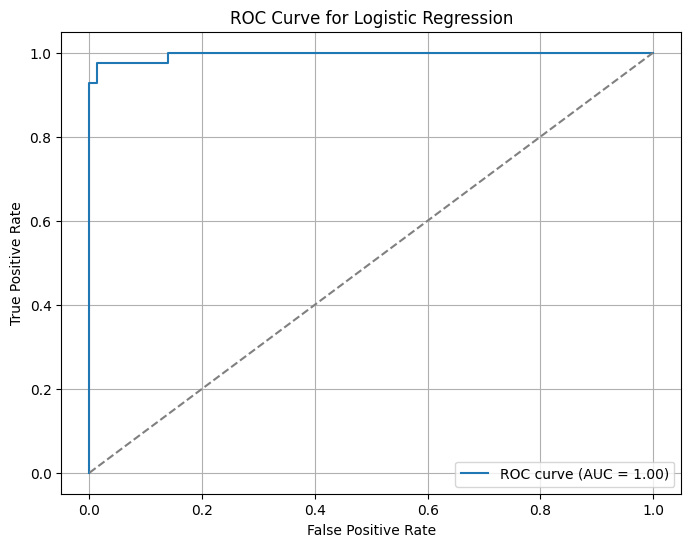


Confusion Matrix with threshold = 0.4:
[[71  1]
 [ 2 40]]

Classification Report with threshold = 0.4:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('C:\\Users\\prach\\Downloads\\data.csv')

# Print original unique diagnosis values
print("Original diagnosis unique values:", df['diagnosis'].unique())

# Strip whitespace and map diagnosis to binary (M=1, B=0)
df['diagnosis'] = df['diagnosis'].str.strip()
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("\nAfter mapping, diagnosis value counts:")
print(df['diagnosis'].value_counts(dropna=False))

# Drop rows with missing diagnosis if any
df = df.dropna(subset=['diagnosis'])
print("\nShape after dropping NaNs in diagnosis:", df.shape)

# Drop irrelevant columns if they exist
if 'id' in df.columns:
    df.drop(['id'], axis=1, inplace=True)
if 'Unnamed: 32' in df.columns:
    df.drop(['Unnamed: 32'], axis=1, inplace=True)

# Separate features and target
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

print("\nFinal dataset shapes:")
print("X:", X.shape, "Y:", Y.shape)

# Train-test split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTrain and test shapes after scaling:")
print("X_train:", X_train_scaled.shape, "X_test:", X_test_scaled.shape)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, Y_train)

# Predictions and predicted probabilities
Y_pred = model.predict(X_test_scaled)
Y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1

# Evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_proba)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# Threshold tuning example (change threshold from default 0.5)
threshold = 0.4
Y_pred_threshold = (Y_proba >= threshold).astype(int)

print(f"\nConfusion Matrix with threshold = {threshold}:")
print(confusion_matrix(Y_test, Y_pred_threshold))

print(f"\nClassification Report with threshold = {threshold}:")
print(classification_report(Y_test, Y_pred_threshold))


## Conclusion

Logistic regression accurately classified benign and malignant breast tumors with 96% accuracy.

Achieved high precision and recall, showing reliable predictions.

The ROC-AUC score of 1.00 indicates excellent separation between classes.

Adjusting the classification threshold improved recall, reducing false negatives.

Overall, logistic regression is an effective and interpretable model for this binary classification task.

